In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv


# Load Data


In [2]:
df = pd.read_csv('/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv')

# View Data

In [3]:
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


# Clear unwanted data

In [4]:
data = df.copy()

data.drop('Unnamed: 0', axis =1, inplace = True)

# View data 

<AxesSubplot: xlabel='YearsExperience', ylabel='Salary'>

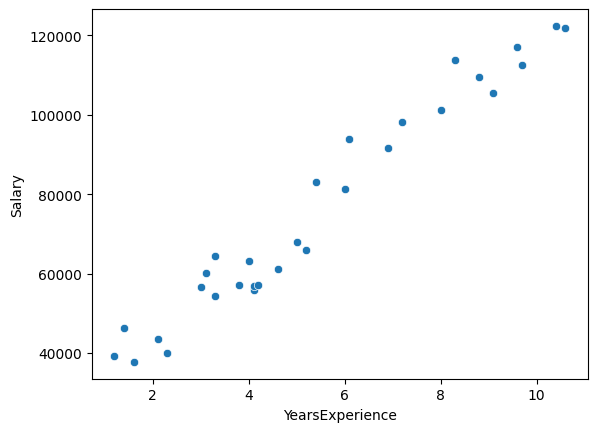

In [5]:
# Scatter plot showing the relationship between 'YearsExperience' and 'Salary'
sns.scatterplot(data = data, x = 'YearsExperience', y = 'Salary' ) # Your code here


# Applying Linear Regression

## Importing Library

In [6]:
from sklearn import linear_model

## Defining X and y

In [7]:
from sklearn.model_selection import train_test_split

X = np.array(data.YearsExperience).reshape(-1,1)
y = np.array(data.Salary).reshape(-1,1)

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)


## Fitting the model

In [8]:
reg = linear_model.LinearRegression()
reg.fit(train_X,train_y)

print("Return the coefficient of determination of the prediction: " ,reg.score(X, y))

print("Estimated coefficients for the linear regression problem: ", reg.coef_)

print("Independent term in the linear model: ", reg.intercept_)

Return the coefficient of determination of the prediction:  0.9554591781005436
Estimated coefficients for the linear regression problem:  [[9261.56845302]]
Independent term in the linear model:  [24967.14887377]


## Predict a new value

0.9180980074804028


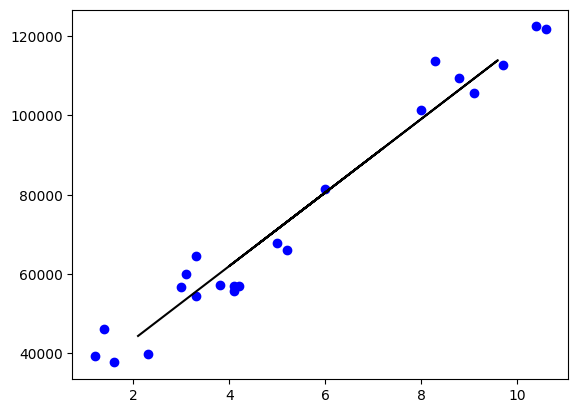

In [9]:
y_pred = reg.predict(val_X)

print(reg.score(val_X, val_y))

plt.scatter(train_X, train_y, color ='b')
plt.plot(val_X, y_pred, color ='k')
 
plt.show()

## Verifying errors

In [10]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
#train_X, val_X, train_y, val_y
mae = mean_absolute_error(y_true=val_y,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=val_y,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=val_y,y_pred=y_pred,squared=False)
 
print("Meam Absolute Error:",mae)
print("Meam Squared Error:",mse)
print("Root mean square error:",rmse)

Meam Absolute Error: 5215.553722712967
Meam Squared Error: 40884620.50478403
Root mean square error: 6394.10826501898
